In [176]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
  
def plotar_heatmap(df,pasta): 
    plt.figure(figsize = (10,7))

    sns.heatmap(df, cmap="RdBu", center=0, cbar_kws={'label': "Diferenças"}).set(title=pasta, xlabel="Parâmetros", ylabel="Amostras")
    
def plotar_diferenca(pasta): 
    df = pd.read_csv(os.path.join(pasta, "advers_normalizado.csv"))-pd.read_csv(os.path.join(pasta, "orig_normalizado.csv"))
    plotar_heatmap(df,pasta)
    return df

def comparar_normalizado(pasta): 
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))

    fig.suptitle(pasta)
    
    data = pd.read_csv(os.path.join(pasta, "orig_normalizado.csv"))
    sns.barplot(x="index", y=data.mean(axis = 1), 
                data=data.reset_index(), 
                palette = 'crest', ax=axes[0]).set(title="Original", xlabel="Amostras", ylabel="Média dos Parâmetros")
    
    data = pd.read_csv(os.path.join(pasta, "advers_normalizado.csv"))
    sns.barplot(x="index", y=data.mean(axis = 1), 
                data=data.reset_index(), 
                palette = 'crest', ax=axes[1]).set(title="Adversária", xlabel="Amostras", ylabel="Média dos Parâmetros")
            
def comparar_atributos_normalizado(pasta, limiarMedia = False): 
    fig, axes = plt.subplots(1, 1, figsize=(18, 4))

    fig.suptitle(pasta)
    
    dataOrig = pd.read_csv(os.path.join(pasta, "orig_normalizado.csv"))
    dataAdvs = pd.read_csv(os.path.join(pasta, "advers_normalizado.csv"))
    cols = dataOrig.columns
    mediaOrig = dataOrig.mean(axis = 0)
    mediaAdvs = dataAdvs.mean(axis = 0)
    difMedia = mediaOrig - mediaAdvs
    limiar = 0.0001
    if limiarMedia:
        limiar = difMedia.abs().mean()
    colsGraf = []
    dataGraf = []
    for x in cols:
        if abs(difMedia[x]) > limiar:
            colsGraf.append(x)
            dataGraf.append(difMedia[x])
    
    g = sns.barplot(x=colsGraf, y=dataGraf, palette = 'crest')
    g.set(title="Diferença das médias dos atributos", xlabel="Atributos", ylabel="média do original - média do adversário")
    g.tick_params(labelrotation=90)

def plotar_barras(df):
    plt.figure(figsize = (10,7))
    df = df[df.columns].apply(abs)
    df["soma"] = df[df.columns].sum(axis=1)

    sns.barplot(x="index", y="soma", data=df.reset_index(), palette = 'crest').set(title="Total de Diferenças", xlabel="Amostras", ylabel="Soma das Diferenças dos Parâmetros")
    
def abrir_amostras(df):
    lista_amostras = df.index.values.tolist()

    lista_amostras

    for n_amostra in lista_amostras:
        amostra = df.loc[[n_amostra]].transpose()
        amostra = amostra.sort_values(n_amostra, ascending=False)
        #print(amostra.head())
        print("Amostra "+ str(amostra.columns.values) + " - " + amostra.index.values[0] + " - " + str(amostra.values[0]))

In [177]:
abs(data.mean(axis = 0).abs().mean())

0.3962943599515624

<h2>DoS detectados como Normais</h2>

Comparo o dataset em suas 2 versões, original normalizado e alterado normalizado, ploto em barras as médias.

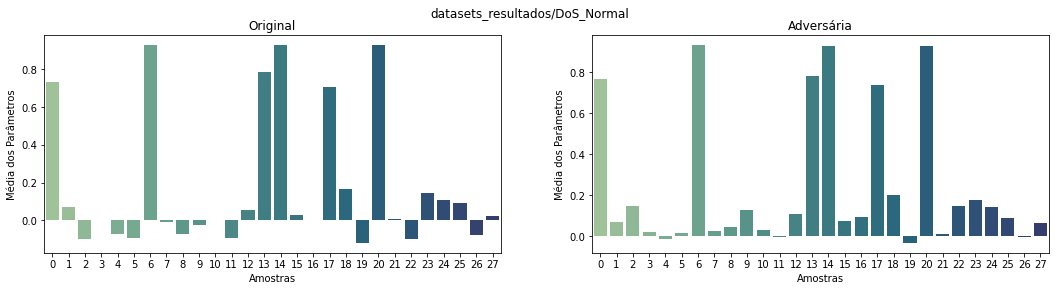

In [178]:
comparar_normalizado("datasets_resultados/DoS_Normal")

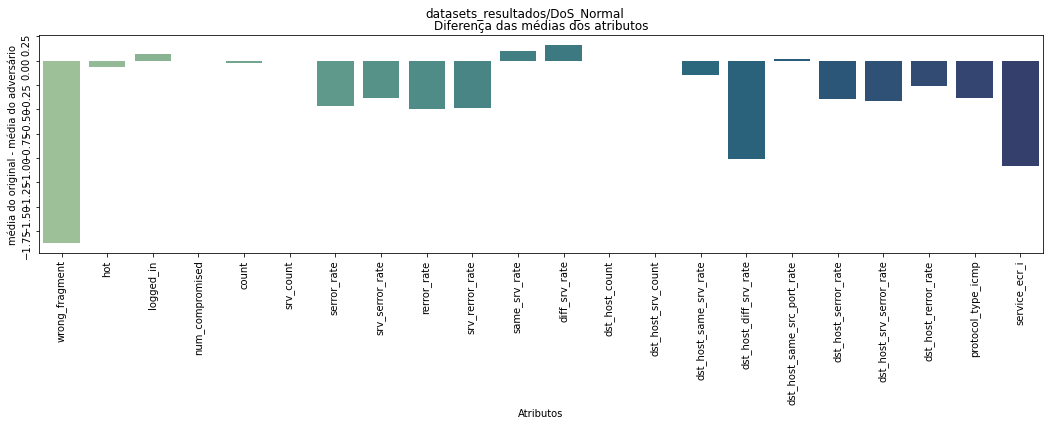

In [179]:
comparar_atributos_normalizado("datasets_resultados/DoS_Normal")

Coloco em gráfico as diferenças.

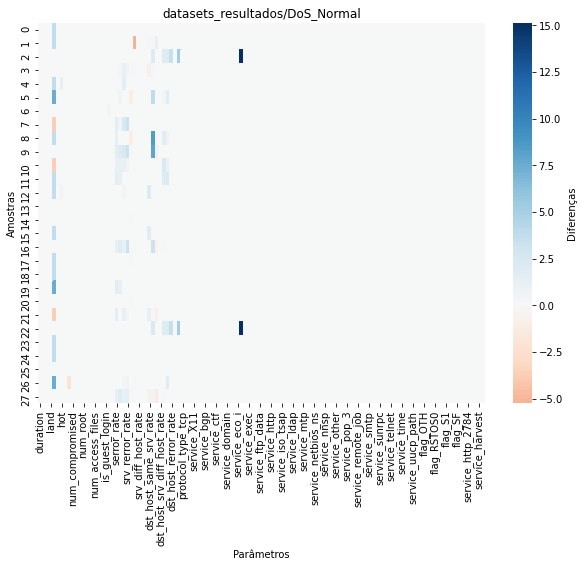

In [180]:
diferenca = plotar_diferenca("datasets_resultados/DoS_Normal")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

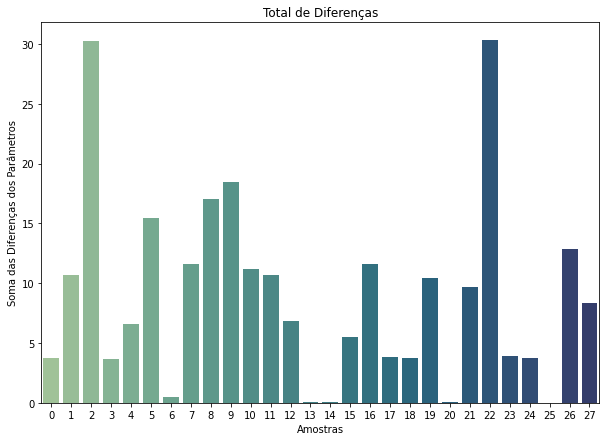

In [181]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [182]:
abrir_amostras(diferenca)

Amostra [0] - wrong_fragment - [3.74184854]
Amostra [1] - wrong_fragment - [3.74184854]
Amostra [2] - service_ecr_i - [15.12983317]
Amostra [3] - rerror_rate - [1.24463278]
Amostra [4] - wrong_fragment - [3.74184854]
Amostra [5] - wrong_fragment - [7.48369708]
Amostra [6] - count - [0.47483594]
Amostra [7] - srv_rerror_rate - [3.2022336]
Amostra [8] - dst_host_diff_srv_rate - [8.39918882]
Amostra [9] - dst_host_diff_srv_rate - [8.02380612]
Amostra [10] - dst_host_serror_rate - [2.1688457]
Amostra [11] - wrong_fragment - [3.74184854]
Amostra [12] - wrong_fragment - [3.74184854]
Amostra [13] - count - [0.01826292]
Amostra [14] - count - [0.02739438]
Amostra [15] - wrong_fragment - [3.74184854]
Amostra [16] - dst_host_diff_srv_rate - [3.33152188]
Amostra [17] - wrong_fragment - [3.74184854]
Amostra [18] - wrong_fragment - [3.74184854]
Amostra [19] - wrong_fragment - [7.48369708]
Amostra [20] - count - [0.02739438]
Amostra [21] - serror_rate - [1.63125191]
Amostra [22] - service_ecr_i - [1

<h2>Normais detectados como DoS</h2>

Comparo o dataset em suas 2 versões, original normalizado e alterado normalizado, ploto em barras as médias.

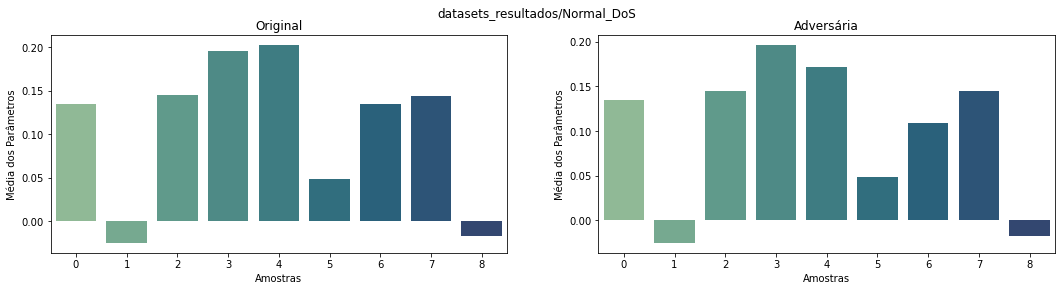

In [183]:
comparar_normalizado("datasets_resultados/Normal_DoS")

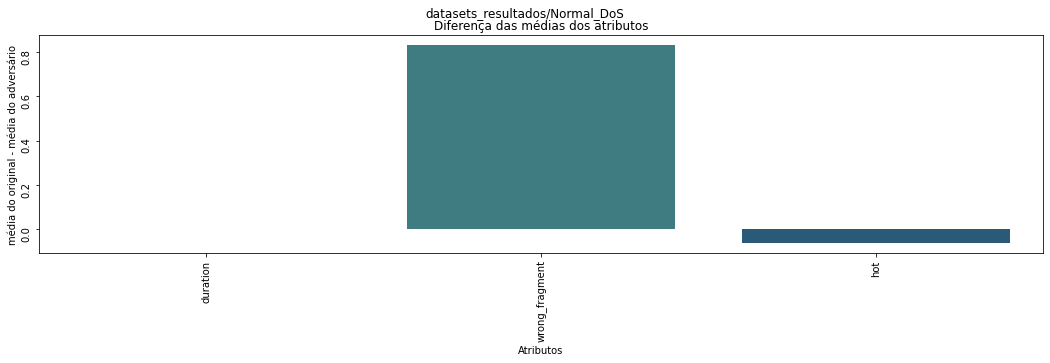

In [184]:
comparar_atributos_normalizado("datasets_resultados/Normal_DoS")

Coloco em gráfico as diferenças.

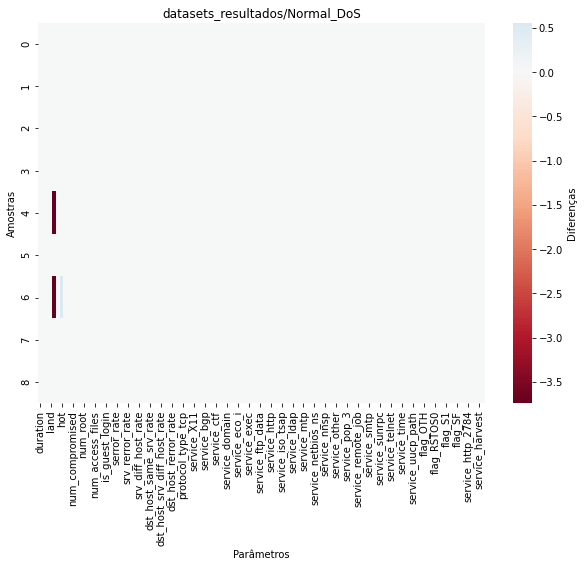

In [185]:
diferenca = plotar_diferenca("datasets_resultados/Normal_DoS")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

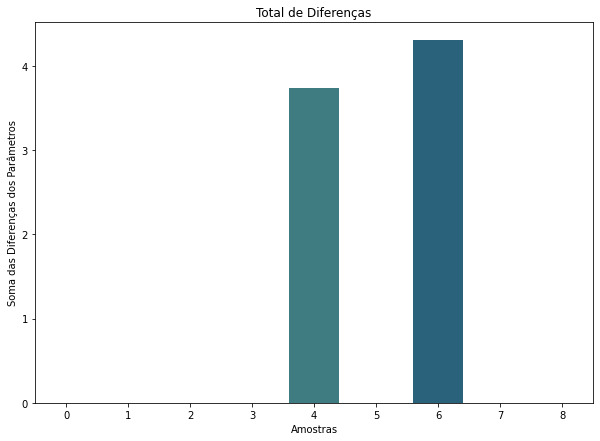

In [186]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [187]:
abrir_amostras(diferenca)

Amostra [0] - dst_bytes - [1.97932604e-05]
Amostra [1] - dst_bytes - [1.97932604e-05]
Amostra [2] - duration - [0.00099088]
Amostra [3] - duration - [0.00198176]
Amostra [4] - dst_host_same_srv_rate - [1.58025512e-08]
Amostra [5] - dst_bytes - [1.97932604e-05]
Amostra [6] - hot - [0.55833284]
Amostra [7] - duration - [0.00099088]
Amostra [8] - duration - [0.00099088]


<h2>Probe detectados como Normais</h2>

Comparo o dataset em suas 2 versões, original normalizado e alterado normalizado, ploto em barras as médias.

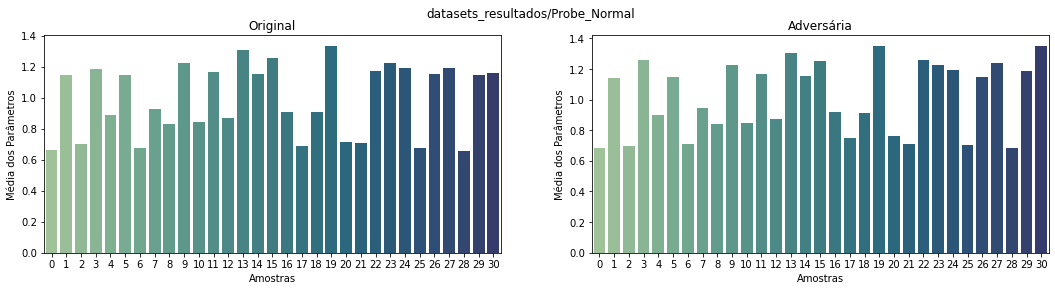

In [188]:
comparar_normalizado("datasets_resultados/Probe_Normal")

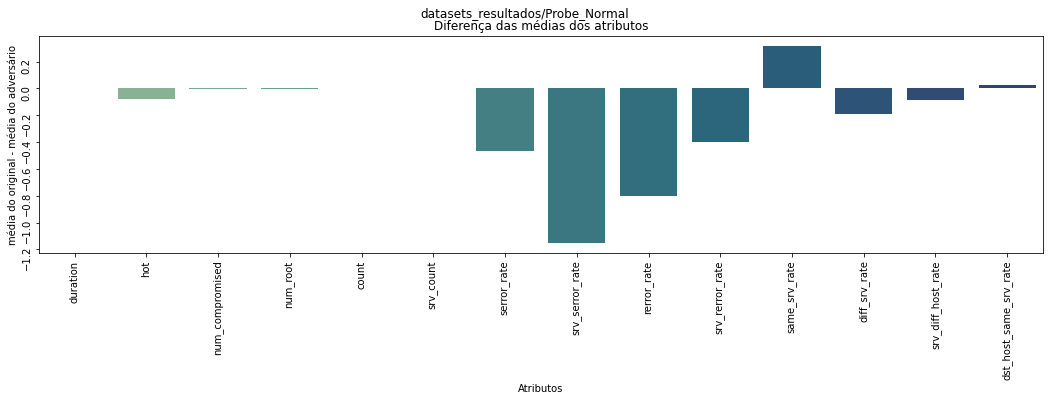

In [189]:
comparar_atributos_normalizado("datasets_resultados/Probe_Normal")

Coloco em gráfico as diferenças.

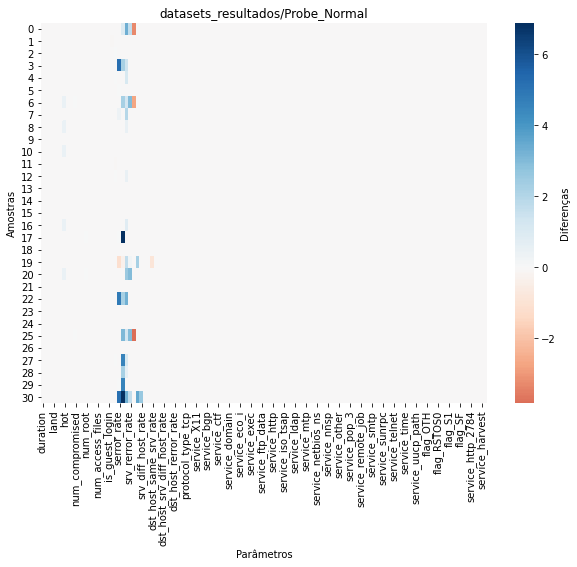

In [190]:
diferenca = plotar_diferenca("datasets_resultados/Probe_Normal")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

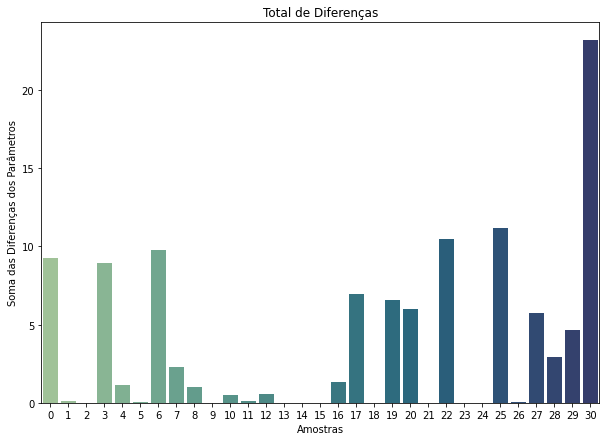

In [191]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [192]:
abrir_amostras(diferenca)

Amostra [0] - rerror_rate - [3.35606588]
Amostra [1] - dst_host_rerror_rate - [3.71217501e-10]
Amostra [2] - srv_count - [0.01775535]
Amostra [3] - serror_rate - [5.21933171]
Amostra [4] - rerror_rate - [1.12993172]
Amostra [5] - serror_rate - [0.04578362]
Amostra [6] - srv_rerror_rate - [2.96493534]
Amostra [7] - rerror_rate - [1.97316449]
Amostra [8] - rerror_rate - [0.52280489]
Amostra [9] - duration - [0.00030602]
Amostra [10] - hot - [0.46885489]
Amostra [11] - duration - [0.00030602]
Amostra [12] - rerror_rate - [0.52280423]
Amostra [13] - duration - [0.00030602]
Amostra [14] - duration - [0.00030602]
Amostra [15] - duration - [0.00030602]
Amostra [16] - rerror_rate - [0.84323265]
Amostra [17] - srv_serror_rate - [6.88285013]
Amostra [18] - duration - [0.00030602]
Amostra [19] - diff_srv_rate - [2.31929044]
Amostra [20] - srv_rerror_rate - [2.96493618]
Amostra [21] - duration - [0.00030602]
Amostra [22] - serror_rate - [4.85306308]
Amostra [23] - count - [0.01242812]
Amostra [24]

<h2>Normais detectados como Probe</h2>

Comparo o dataset em suas 2 versões, original normalizado e alterado normalizado, ploto em barras as médias.

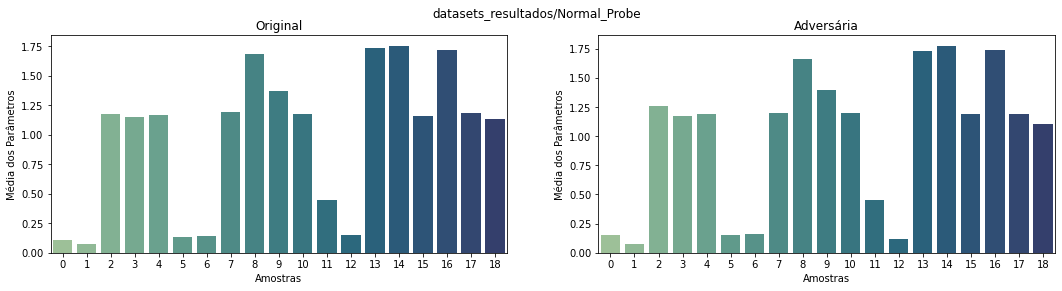

In [193]:
comparar_normalizado("datasets_resultados/Normal_Probe")

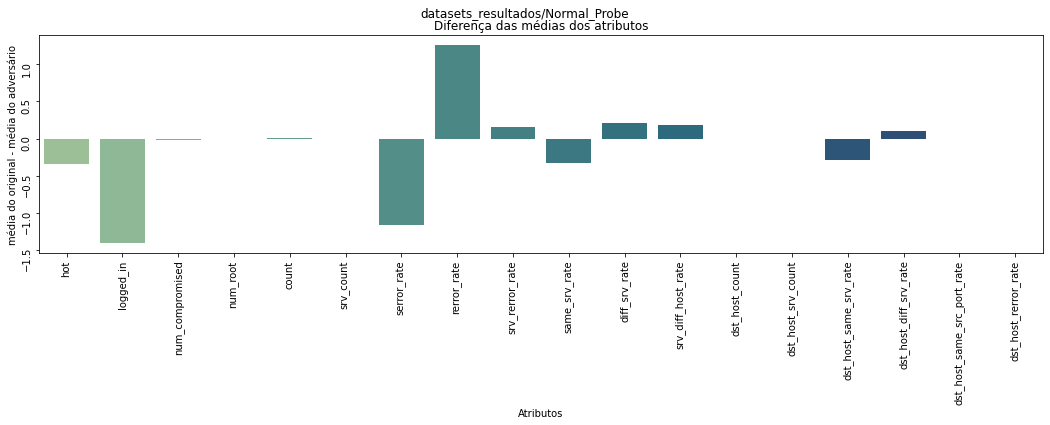

In [194]:
comparar_atributos_normalizado("datasets_resultados/Normal_Probe")

Coloco em gráfico as diferenças.

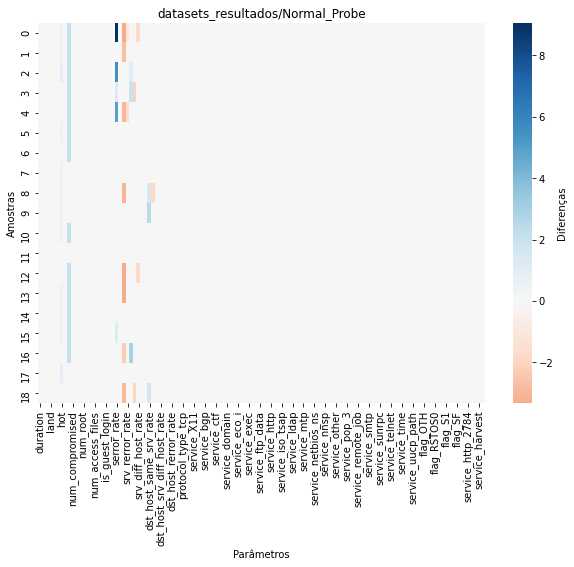

In [195]:
diferenca = plotar_diferenca("datasets_resultados/Normal_Probe")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

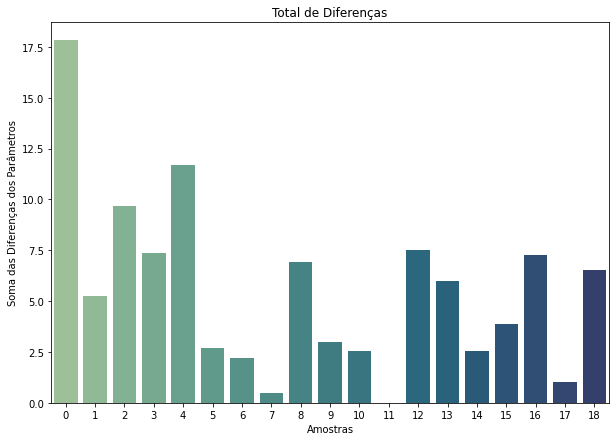

In [196]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [197]:
abrir_amostras(diferenca)

Amostra [0] - serror_rate - [9.0651553]
Amostra [1] - logged_in - [2.04728755]
Amostra [2] - serror_rate - [5.494034]
Amostra [3] - logged_in - [2.04728755]
Amostra [4] - serror_rate - [4.9904155]
Amostra [5] - logged_in - [2.04728755]
Amostra [6] - logged_in - [2.04728755]
Amostra [7] - hot - [0.46885489]
Amostra [8] - dst_host_same_srv_rate - [1.57814414]
Amostra [9] - dst_host_same_srv_rate - [2.45927468]
Amostra [10] - logged_in - [2.04728755]
Amostra [11] - dst_bytes - [1.96949978e-07]
Amostra [12] - logged_in - [2.04728755]
Amostra [13] - logged_in - [2.04728755]
Amostra [14] - logged_in - [2.04728755]
Amostra [15] - logged_in - [2.04728755]
Amostra [16] - same_srv_rate - [2.95565015]
Amostra [17] - hot - [0.93770977]
Amostra [18] - dst_host_same_srv_rate - [1.56499292]


<h2>U2R detectados como Normal</h2>

Comparo o dataset em suas 2 versões, original normalizado e alterado normalizado, ploto em barras as médias.

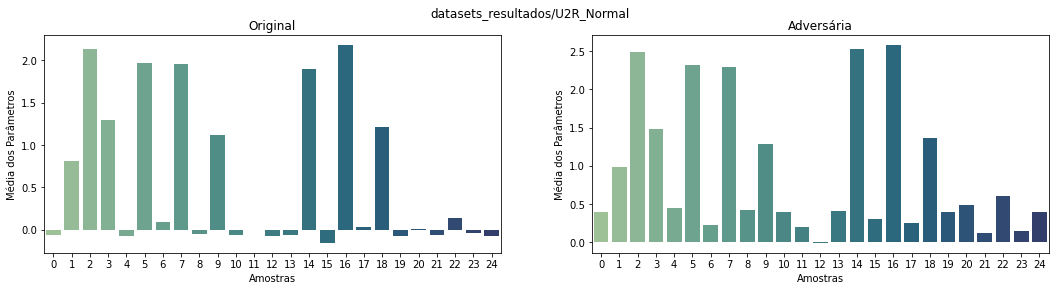

In [198]:
comparar_normalizado("datasets_resultados/U2R_Normal")

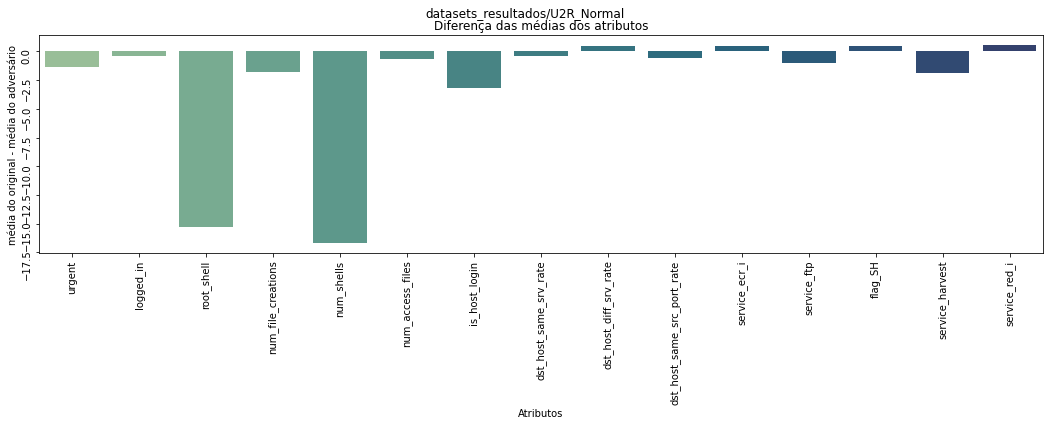

In [202]:
comparar_atributos_normalizado("datasets_resultados/U2R_Normal", limiarMedia = True)

Coloco em gráfico as diferenças.

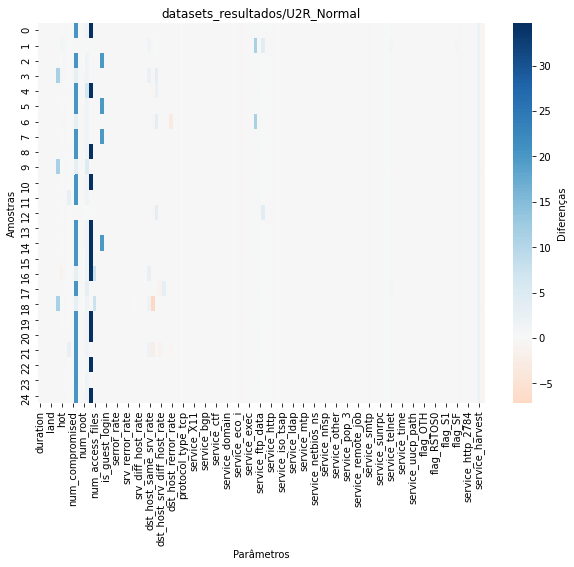

In [19]:
diferenca = plotar_diferenca("datasets_resultados/U2R_Normal")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

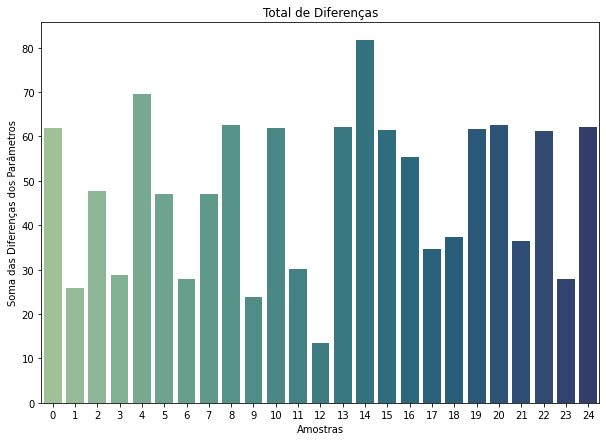

In [20]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [21]:
abrir_amostras(diferenca)

Amostra [0] - num_shells - [34.70428897]
Amostra [1] - service_ftp - [11.16830618]
Amostra [2] - root_shell - [20.36490669]
Amostra [3] - urgent - [11.17415175]
Amostra [4] - num_shells - [34.70428897]
Amostra [5] - root_shell - [20.36490669]
Amostra [6] - service_ftp - [11.16830618]
Amostra [7] - root_shell - [20.36490669]
Amostra [8] - num_shells - [34.70428897]
Amostra [9] - urgent - [11.17415175]
Amostra [10] - num_shells - [34.70428897]
Amostra [11] - root_shell - [20.36490669]
Amostra [12] - service_gopher - [3.83760736]
Amostra [13] - num_shells - [34.70428897]
Amostra [14] - num_shells - [34.70428897]
Amostra [15] - num_shells - [34.70428897]
Amostra [16] - num_shells - [34.70428897]
Amostra [17] - root_shell - [20.36490669]
Amostra [18] - urgent - [11.17415175]
Amostra [19] - num_shells - [34.70428897]
Amostra [20] - num_shells - [34.70428897]
Amostra [21] - root_shell - [20.36490669]
Amostra [22] - num_shells - [34.70428897]
Amostra [23] - root_shell - [20.36490669]
Amostra [

<h2>Normal detectados como U2R</h2>

Sem amostras classificadas de forma errada.

<h2>R2L detectados como Normal</h2>

Comparo o dataset em suas 2 versões, original normalizado e alterado normalizado, ploto em barras as médias.

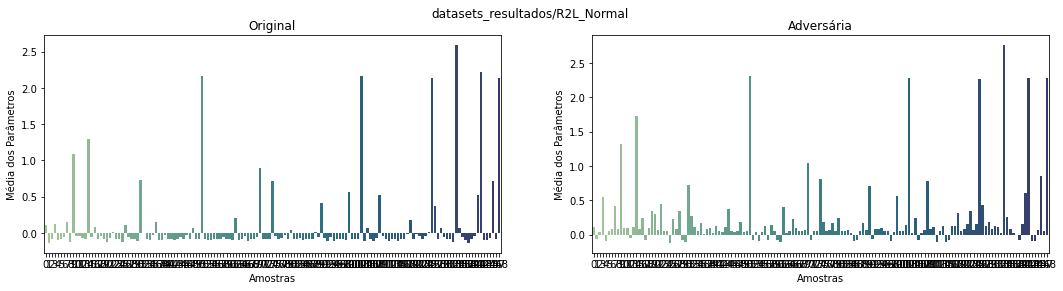

In [204]:
comparar_normalizado("datasets_resultados/R2L_Normal")

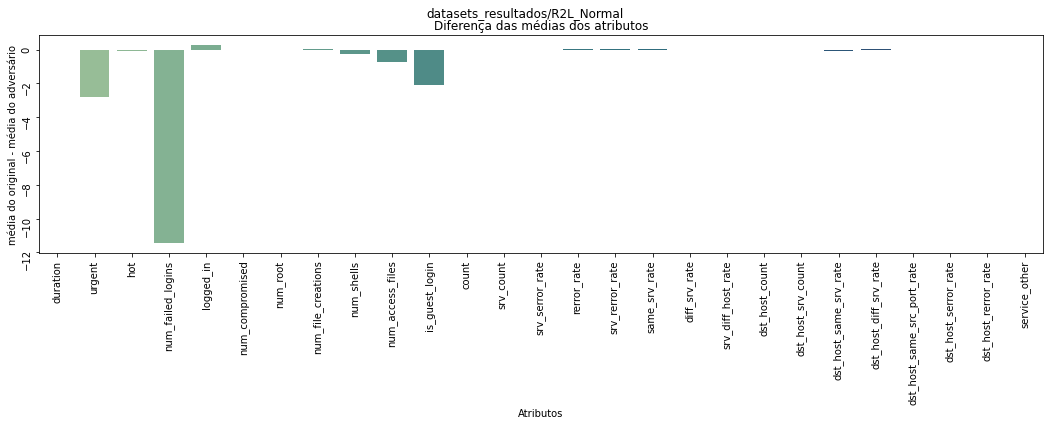

In [205]:
comparar_atributos_normalizado("datasets_resultados/R2L_Normal")

Coloco em gráfico as diferenças.

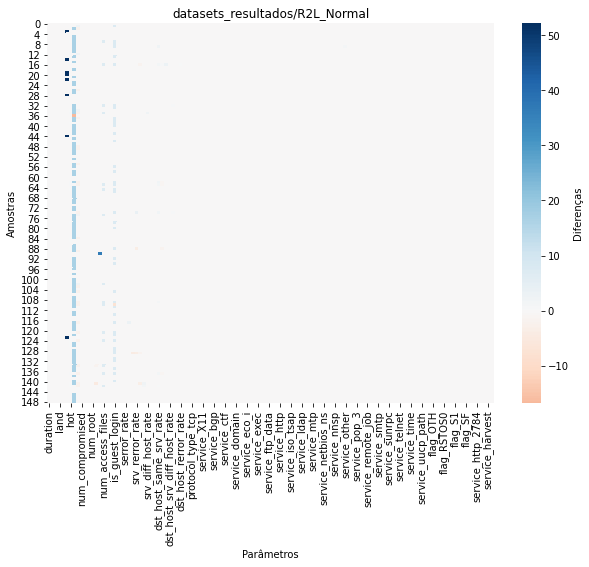

In [206]:
diferenca = plotar_diferenca("datasets_resultados/R2L_Normal")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

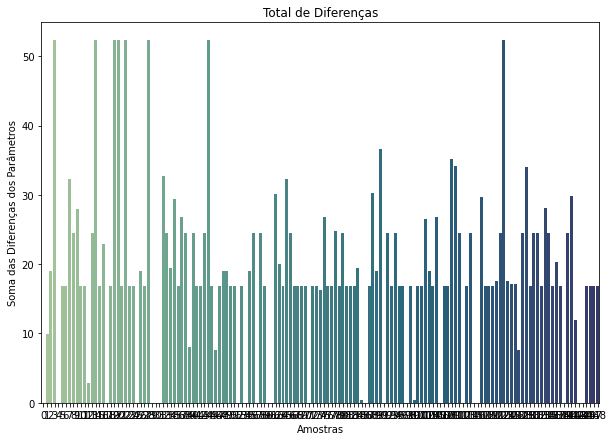

In [207]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [208]:
abrir_amostras(diferenca)

Amostra [0] - service_gopher - [0.]
Amostra [1] - is_guest_login - [7.65756063]
Amostra [2] - num_failed_logins - [16.85060604]
Amostra [3] - urgent - [52.28566177]
Amostra [4] - duration - [0.00075541]
Amostra [5] - num_failed_logins - [16.85060604]
Amostra [6] - num_failed_logins - [16.85060604]
Amostra [7] - num_failed_logins - [16.85060604]
Amostra [8] - num_failed_logins - [16.85060604]
Amostra [9] - num_failed_logins - [16.85060604]
Amostra [10] - num_failed_logins - [16.85060604]
Amostra [11] - num_failed_logins - [16.85060604]
Amostra [12] - logged_in - [2.21200495]
Amostra [13] - num_failed_logins - [16.85060604]
Amostra [14] - urgent - [52.28566177]
Amostra [15] - num_failed_logins - [16.85060604]
Amostra [16] - is_guest_login - [7.65756063]
Amostra [17] - dst_bytes - [9.96028754e-06]
Amostra [18] - num_failed_logins - [16.85060604]
Amostra [19] - urgent - [52.28566177]
Amostra [20] - urgent - [52.28566177]
Amostra [21] - num_failed_logins - [16.85060604]
Amostra [22] - urgen

<h2>Normal detectados como R2L</h2>

Comparo o dataset em suas 2 versões, original normalizado e alterado normalizado, ploto em barras as médias.

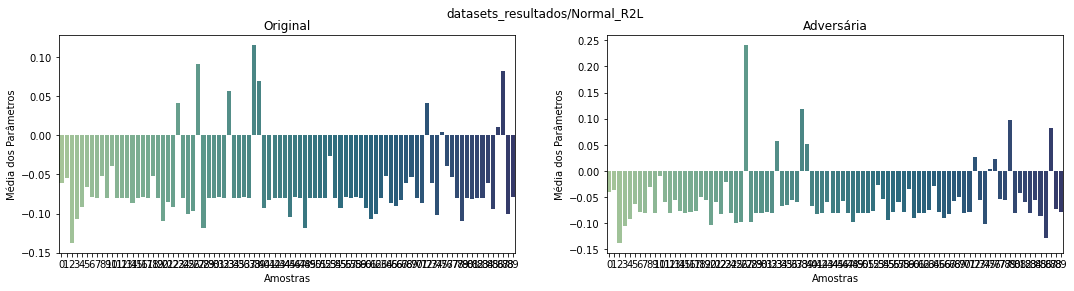

In [210]:
comparar_normalizado("datasets_resultados/Normal_R2L")

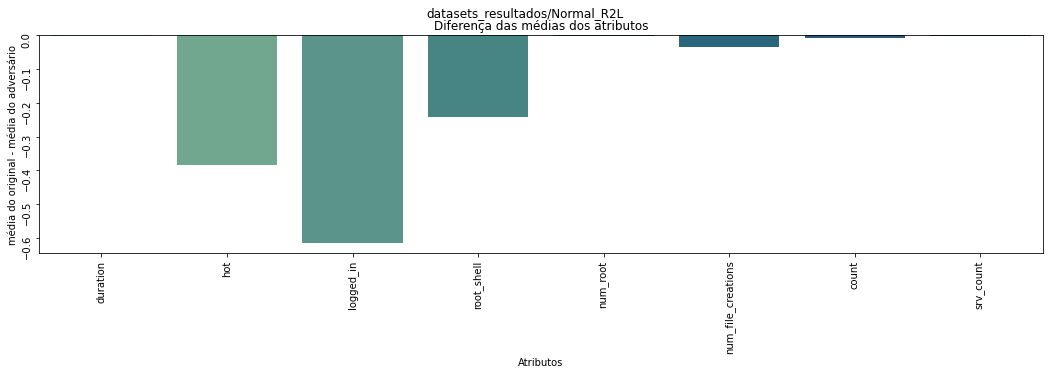

In [211]:
comparar_atributos_normalizado("datasets_resultados/Normal_R2L")

Coloco em gráfico as diferenças.

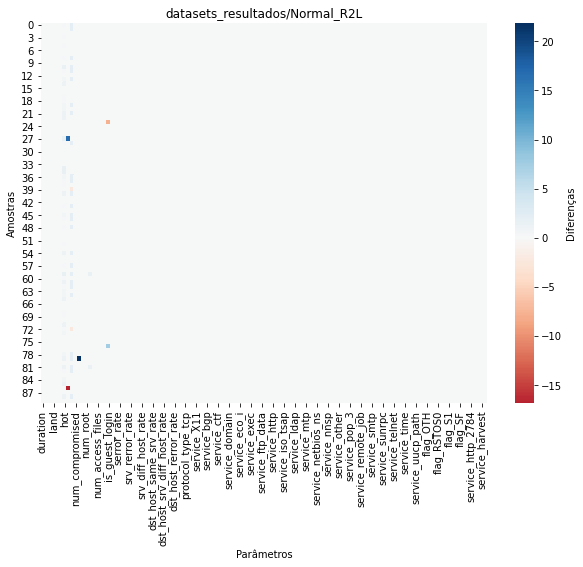

In [212]:
diferenca = plotar_diferenca("datasets_resultados/Normal_R2L")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

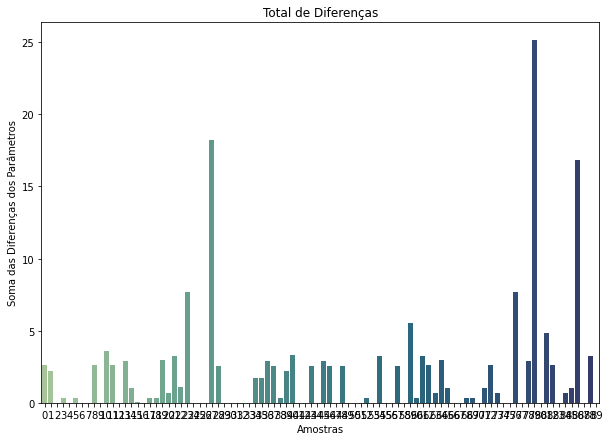

In [213]:
plotar_barras(diferenca)

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [214]:
abrir_amostras(diferenca)

Amostra [0] - logged_in - [2.21200495]
Amostra [1] - logged_in - [2.21200495]
Amostra [2] - duration - [0.]
Amostra [3] - hot - [0.34462721]
Amostra [4] - duration - [0.]
Amostra [5] - hot - [0.34462721]
Amostra [6] - duration - [0.00377706]
Amostra [7] - dst_bytes - [9.96028754e-06]
Amostra [8] - logged_in - [2.21200495]
Amostra [9] - duration - [0.00377706]
Amostra [10] - logged_in - [2.21200495]
Amostra [11] - logged_in - [2.21200495]
Amostra [12] - duration - [0.00151083]
Amostra [13] - logged_in - [2.21200495]
Amostra [14] - hot - [1.03388164]
Amostra [15] - count - [0.03725007]
Amostra [16] - dst_bytes - [9.96028754e-06]
Amostra [17] - hot - [0.34462721]
Amostra [18] - hot - [0.34462721]
Amostra [19] - logged_in - [2.21200495]
Amostra [20] - hot - [0.68925443]
Amostra [21] - logged_in - [2.21200495]
Amostra [22] - hot - [1.03388164]
Amostra [23] - same_srv_rate - [5.39796157e-08]
Amostra [24] - duration - [0.]
Amostra [25] - duration - [0.]
Amostra [26] - duration - [0.]
Amostra 